<a href="https://colab.research.google.com/github/apestatistica/Fasam/blob/master/Exercicio_%20Algoritmos_Supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://nextcomm.com.br/wp-content/uploads/freshizer/cafe49ac037bb39fe104b3bf15177701_gestao_telecom2-1156-577-c.jpg) 
![](http://redeplanetanet.com.br/mkfiles/image/sac_01.png) 

Somos o setor de suporte de uma empresa de Telecom. Recebemos centenas de mensagens pelo nosso canal de atendimento no CHAT, essas mensagens são lidas e posteriomente encaminhadas para o setor responsável.

Esse processo está ficando lento e precisamos otimizar a dicição de qual setor será o responsável pelo atendimento. Nosso centro de tecnologia sugeriu utilizar Inteligência Artificial para classificar as mensagens automaticamente. 

**Acha que consegue?**

* Crie um modelo que melhor classifique os textos
* Otimize o modelo usando diferentes parametrizações
* Escolha um setor e descreva quais features estão associadas a esse setor nos chamados

In [34]:
! wget https://storage.googleapis.com/ms_geral/fasam_algoritmo_supervisionado/taggin/util.py

--2019-04-27 17:00:57--  https://storage.googleapis.com/ms_geral/fasam_algoritmo_supervisionado/taggin/util.py
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3020 (2.9K) [application/octet-stream]
Saving to: ‘util.py’

util.py             100%[===================>]   2.95K  --.-KB/s    in 0s      

2019-04-27 17:00:57 (35.2 MB/s) - ‘util.py’ saved [3020/3020]



In [0]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import warnings

from util import *

warnings.filterwarnings('ignore')
np.set_printoptions(precision=2)
%matplotlib inline 

## Problema

Problema de classificação de texto

![](https://i.ytimg.com/vi/uJpU0rYUokM/maxresdefault.jpg) 

## Dataset

In [0]:
df = pd.read_csv('https://storage.googleapis.com/ms_geral/fasam_algoritmo_supervisionado/taggin/df_train.csv')

df.head(12)

,frase,tag
0,é que minha reparo na linha,reparar-linha
1,meu telefone não disca,reparar-linha
2,é tinha um técnico ajudar agendado pra vir vis...,vago-visitaTecnica
3,eu quero solicitação de uma linha,comprar-linha
4,eu quero alterar o endereço de pra enviar minh...,mudar-endereco
5,eu quero mudar o endereço,mudar-endereco
6,quero adquirir uma linha produto,comprar-linha
7,eu quero uma nova linha,comprar-linha
8,eu preciso pagar a minha conta eu quero saber ...,pagar-conta
9,eu quero é transferir o número dado meu telefo...,mudar-endereco


In [0]:
df.shape

(2623, 2)

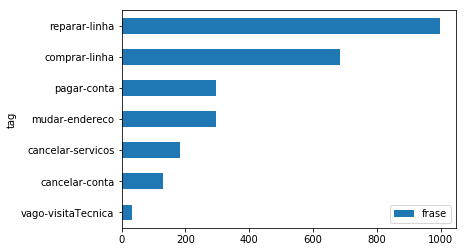

In [0]:
# Plot total por setor
df.groupby('tag').count().sort_values('frase').plot.barh()

## Preparação dos Dados

### Split DataSet

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, \
    y_train, y_test = train_test_split(df.frase, df.tag, 
                                           test_size=0.20, 
                                           random_state=42)

In [0]:
print(X_train.shape, X_test.shape)

(2098,) (525,)


### Extração de *Features*

* https://scikit-learn.org/stable/modules/feature_extraction.html

In [0]:
sample_text = X_train[3]
sample_text



'eu quero solicitação de uma linha'

In [0]:
sample_text2 = X_train[2]
sample_text2

'é tinha um técnico ajudar agendado pra vir visita pra ver o internet e não veio'

#### Contagem de Palavras (BoW)

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

Utiliza de contagem de palavras como vetor de features para indicar a importância dessa palavra no contexto.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10, ngram_range=(1,1), stop_words=['não', 'de','uma', 'na','meu', 'minha',"que","porque","fazer","quero","do","faço","saber","um","com","está","tá","da", 'para', 'tinha',"como","eu","pra","se"])
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['não', 'de', 'uma', 'na', 'meu', 'minha', 'que', 'porque', 'fazer', 'quero', 'do', 'faço', 'saber', 'um', 'com', 'está', 'tá', 'da', 'para', 'tinha', 'como', 'eu', 'pra', 'se'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
# Cada Feature é uma palávra 
features = [x[0] for x in sorted(vectorizer.vocabulary_.items(), key=lambda kv: kv[1])]
print(features)

['cancelar', 'conta', 'endereço', 'ligação', 'linha', 'pagar', 'produto', 'reparo', 'telefone', 'telefônica']


In [0]:
vector = vectorizer.transform([sample_text])

print("Texto:",    sample_text)
print("Features:", features)
print("Valores:",  vector.toarray()[0])

Texto: eu quero solicitação de uma linha
Features: ['cancelar', 'conta', 'endereço', 'ligação', 'linha', 'pagar', 'produto', 'reparo', 'telefone', 'telefônica']
Valores: [0 0 0 0 1 0 0 0 0 0]


In [0]:
vector = vectorizer.transform([sample_text2])

print("Texto:",    sample_text2)
print("Features:", features)
print("Valores:",  vector.toarray()[0])

Texto: é tinha um técnico ajudar agendado pra vir visita pra ver o internet e não veio
Features: ['cancelar', 'conta', 'endereço', 'ligação', 'linha', 'pagar', 'produto', 'reparo', 'telefone', 'telefônica']
Valores: [0 0 0 0 0 0 0 0 0 0]


#### TF-IDF

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

O valor tf–idf (abreviação do inglês term frequency–inverse document frequency, que significa frequência do termo–inverso da frequência nos documentos), é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = TfidfVectorizer(max_features=10)
vectorizer.fit(df.frase)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
# Cada Feature é uma palavra 
features = [x[0] for x in sorted(vectorizer.vocabulary_.items(), key=lambda kv: kv[1])]
print(features)

['de', 'eu', 'linha', 'minha', 'não', 'que', 'quero', 'telefone', 'telefônica', 'uma']


In [0]:
vector = vectorizer.transform([sample_text])

print("Texto:",    sample_text)
print("Features:", features)
print("Valores:",  vector.toarray()[0])

Texto: eu quero solicitação de uma linha
Features: ['de', 'eu', 'linha', 'minha', 'não', 'que', 'quero', 'telefone', 'telefônica', 'uma']
Valores: [0.43717035 0.48128542 0.35084229 0.         0.         0.
 0.43901832 0.         0.         0.51129154]


### Modelo

In [0]:
# Pipeline
from sklearn.pipeline import Pipeline

# Classificadores
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import      DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
# Pipeline Model
model = Pipeline(steps = [
                    ('tfidf', TfidfVectorizer()),
                    ('clf',   RandomForestClassifier(criterion='entropy')),])
model

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

## Treinamento

In [0]:
from sklearn.model_selection import GridSearchCV

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

Gride de parametros que devem ser testados no modelo

In [0]:
parameters = {
    'tfidf__max_features': [1000], 
    'clf__max_depth': [1,  2,  4,  8, 16, 32, 1000],
    'clf__n_estimators': [1, 2, 4, 8, 16]
}

Executa a busca de parametros por GridSearch

In [54]:
clf = GridSearchCV(model, parameters, cv=3, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

{'clf__max_depth': 1000, 'clf__n_estimators': 16, 'tfidf__max_features': 1000}

Escolhe o melhor modelo treinado entre os testados pelas parametrizações

In [55]:
model = clf.best_estimator_
model

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

## Avaliação do modelo

In [0]:
from sklearn import tree

# Tree Model
estimator     = model.steps[-1][1]

# Vectorize Words Features
vectorizer    = model.steps[0][1]
feature_names = [x[0] for x in sorted(vectorizer.vocabulary_.items(), key=lambda kv: kv[1])]

# Class 
class_names   = np.unique(y_train)

# plot
#plot_tree(estimator, feature_names, class_names)

In [57]:
df_importance = feature_importance(estimator, feature_names)
df_importance

,feature,importance
343,endereço,9.950727e-02
222,conta,7.737364e-02
494,linha,5.727825e-02
141,cancelar,5.241463e-02
899,uma,3.620010e-02
841,telefone,3.457216e-02
612,pagar,2.729175e-02
255,de,2.665027e-02
579,não,2.280409e-02
715,quero,1.844360e-02


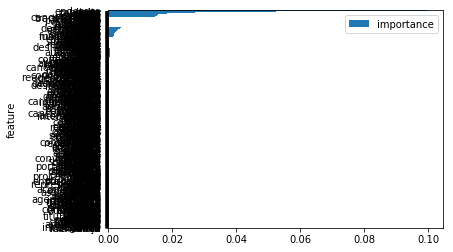

In [58]:
df_importance.set_index('feature').plot.barh()
plt.gca().invert_yaxis()

Normalized confusion matrix


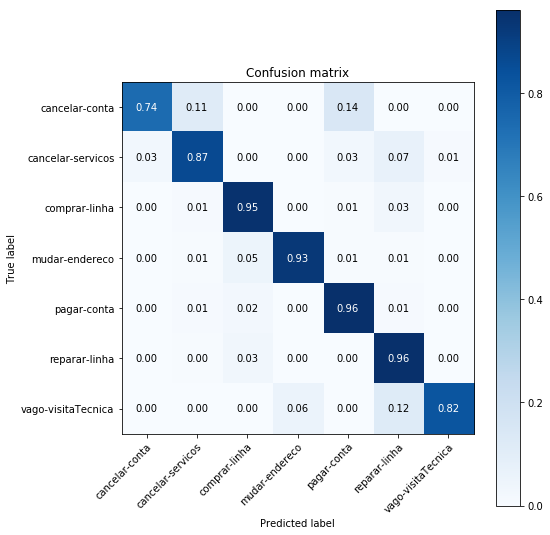

In [59]:
# Load df test
#

df_valid = pd.read_csv('https://storage.googleapis.com/ms_geral/fasam_algoritmo_supervisionado/taggin/df_valid.csv')
X_test   = df_valid['frase']
y_test   = df_valid.tag

# Predict
y_pred = model.predict(X_test)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,normalize=True,
                      title='Confusion matrix')

In [60]:
from sklearn.metrics import f1_score

print("F1-Score: ", f1_score(y_test, y_pred, average='weighted'))

F1-Score:  0.9337328025292028


## Atividades

Desenvolve as atividades:

* Otimize os parâmetros do modelo e encontre o melhor F1-Score
* Escolha um Setor qualquer e analise as principais features relacionadas a esse setor
* Salve o modelo no disco 

### Otimize os parâmetros do modelo e encontre o melhor F1-Score

* Altere as parametrizações do gerador de token
* Modifique o classificador e encontre a melhor parametrização

In [61]:
# 'clf__max_depth': 1000, 'clf__n_estimators': 16, 'tfidf__max_features': 2000
# 0.9173785249674713
# 0.9337328025292028
from sklearn.metrics import f1_score

print("F1-Score: ", f1_score(y_test, y_pred, average='weighted'))

F1-Score:  0.9337328025292028


### Escolha uma Tag/Setor qualquer e analise as principais features relacionadas a esse setor. 

* Interprete a árvore para chegar na conclusão
* 

In [0]:
# -------------------

### Salve o modelo no disco 

* https://scikit-learn.org/stable/modules/model_persistence.html

In [0]:
from joblib import dump, load

In [0]:
joblib.dump(model, 'model.joblib')

In [0]:
loaded_model = joblib.load('model.joblib')

## Referências e Links complementares

* https://medium.com/botsbrasil/o-que-%C3%A9-o-processamento-de-linguagem-natural-49ece9371cff
* https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
* https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5
* https://stackabuse.com/text-classification-with-python-and-scikit-learn/
* https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/